In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
#ファイル読み込み
df = pd.DataFrame()
for i in glob.glob("train/*.csv*"):
    tmp_df=pd.read_csv(i)
    df = pd.concat([df, tmp_df],ignore_index=True)

C:\Users\osako\AppData\Local\Temp\ipykernel_9316\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_9316\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_9316\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_9316\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)


In [3]:
#欠損値確認,欠損値削除
df_rownum=df.shape[0]
df_null_column=df.columns[df.isnull().sum()==df_rownum]
df=df.drop(df_null_column,axis=1)

In [4]:
df

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,...,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1004555,中古マンション等,1101,北海道,札幌市中央区,南２条西,西１８丁目,5,３ＬＤＫ,70,...,ＳＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2009年第2四半期,改装済,NaN,6.982271
1,1051274,中古マンション等,1106,北海道,札幌市南区,川沿１７条,真駒内,30分?60分,４ＬＤＫ,90,...,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2014年第3四半期,改装済,NaN,6.968483
2,1008483,中古マンション等,1101,北海道,札幌市中央区,南１４条西,西１８丁目,29,４ＬＤＫ,95,...,ＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2013年第3四半期,改装済,NaN,7.361728
3,1075401,中古マンション等,1110,北海道,札幌市清田区,清田２条,福住,30分?60分,４ＬＤＫ,80,...,ＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2013年第2四半期,未改装,NaN,6.991226
4,1090633,中古マンション等,1110,北海道,札幌市清田区,清田１条,福住,30分?60分,１ＬＤＫ,35,...,ＲＣ,住宅,NaN,近隣商業地域,80.0,200.0,2008年第4四半期,未改装,NaN,6.579784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765407,47013766,中古マンション等,47201,沖縄県,那覇市,楚辺,県庁前(沖縄),NaN,３ＬＤＫ,60,...,ＲＣ,住宅,NaN,NaN,NaN,NaN,2010年第2四半期,未改装,NaN,7.000000
765408,47023993,中古マンション等,47211,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,65,...,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2015年第2四半期,未改装,NaN,7.230449
765409,47003366,中古マンション等,47208,沖縄県,浦添市,城間,NaN,NaN,２ＬＤＫ,70,...,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,200.0,2017年第2四半期,未改装,NaN,7.462398
765410,47003668,中古マンション等,47208,沖縄県,浦添市,港川,NaN,NaN,４ＬＤＫ,90,...,ＲＣ,NaN,住宅,商業地域,80.0,400.0,2018年第1四半期,改装済,NaN,7.397940


In [5]:
df.drop(['ID',
#                '地区名',
#                '最寄駅：名称',
        '市区町村コード',
#                '用途',
#                '市区町村名',
#                '間取り',
#                '建物の構造',
#                '都市計画'
              ],inplace=True,axis=1)

In [6]:
df['取引の事情等'].unique()

array([nan, '調停・競売等', '瑕疵有りの可能性', '関係者間取引', '他の権利・負担付き', 'その他事情有り',
       '調停・競売等、瑕疵有りの可能性', '他の権利・負担付き、調停・競売等', '関係者間取引、調停・競売等',
       '関係者間取引、瑕疵有りの可能性'], dtype=object)

In [7]:
df["取引の事情等"].fillna(0, inplace=True)
df.loc[df["取引の事情等"] != 0, "取引の事情等"] = 1

In [8]:
#欠損値の多い列を削除
df=df.drop(['今後の利用目的'],axis=1)

In [9]:
#各列のユニークな値を抽出
unique_value=df.apply(pd.Series.unique)
print(unique_value['都道府県名'])

['北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県' '千葉県'
 '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県' '三重県'
 '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県' '徳島県'
 '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県']


In [10]:
df=df.drop(['種類'],axis=1)

In [11]:
df_edit1=df.copy()

In [12]:
df_edit1.dropna(inplace=True)

In [13]:
df_edit1.loc[df_edit1['建築年']=='戦前','建築年']='昭和20年'

In [14]:
df_edit1['和暦名称']=df_edit1['建築年'].str[:2]

In [15]:
df_edit1['西暦']=df_edit1['建築年'].str[2:-1]

In [16]:
df_edit1['西暦'].unique()

array(['61', '7', '11', '8', '2', '50', '21', '57', '49', '55', '4', '14',
       '3', '6', '13', '51', '60', '16', '63', '28', '62', '9', '53',
       '25', '17', '5', '15', '10', '54', '22', '59', '20', '19', '18',
       '48', '64', '12', '39', '45', '56', '23', '46', '58', '47', '52',
       '24', '27', '26', '31', '29', '44', '30', '43', '42', '41', '40',
       '38', '35', '37', '34', '33', '36', '32'], dtype=object)

In [17]:
df_edit1['西暦']=df_edit1['西暦'].astype(int)

In [18]:
df_edit1

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,和暦名称,西暦
0,北海道,札幌市中央区,南２条西,西１８丁目,5,３ＬＤＫ,70,昭和61年,ＳＲＣ,住宅,近隣商業地域,80.0,300.0,2009年第2四半期,改装済,0,6.982271,昭和,61
1,北海道,札幌市南区,川沿１７条,真駒内,30分?60分,４ＬＤＫ,90,平成7年,ＲＣ,住宅,第１種住居地域,60.0,200.0,2014年第3四半期,改装済,0,6.968483,平成,7
2,北海道,札幌市中央区,南１４条西,西１８丁目,29,４ＬＤＫ,95,平成11年,ＲＣ,住宅,近隣商業地域,80.0,300.0,2013年第3四半期,改装済,0,7.361728,平成,11
3,北海道,札幌市清田区,清田２条,福住,30分?60分,４ＬＤＫ,80,平成8年,ＲＣ,住宅,第１種住居地域,60.0,200.0,2013年第2四半期,未改装,0,6.991226,平成,8
4,北海道,札幌市清田区,清田１条,福住,30分?60分,１ＬＤＫ,35,平成2年,ＲＣ,住宅,近隣商業地域,80.0,200.0,2008年第4四半期,未改装,0,6.579784,平成,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765399,沖縄県,那覇市,東町,旭橋,5,２ＬＤＫ,65,平成24年,ＲＣ,住宅,商業地域,80.0,400.0,2019年第4四半期,未改装,0,7.591065,平成,24
765400,沖縄県,那覇市,字大道,安里,6,２ＬＤＫ,60,平成6年,ＲＣ,住宅,第１種住居地域,60.0,200.0,2016年第3四半期,改装済,0,7.255273,平成,6
765403,沖縄県,那覇市,銘苅,古島,16,２ＬＤＫ,60,平成15年,ＲＣ,住宅,第２種中高層住居専用地域,60.0,200.0,2019年第2四半期,未改装,0,7.462398,平成,15
765404,沖縄県,那覇市,小禄,小禄,24,３ＬＤＫ,70,平成19年,ＲＣ,住宅,第１種中高層住居専用地域,60.0,200.0,2013年第2四半期,未改装,0,7.397940,平成,19


In [19]:
df_edit1.loc[df_edit1['和暦名称']=='昭和','西暦']+=1925
df_edit1.loc[df_edit1['和暦名称']=='平成','西暦']+=1988
df_edit1.loc[df_edit1['和暦名称']=='令和','西暦']+=2018

In [20]:
df_edit1.drop(['和暦名称','建築年'],inplace=True,axis=1)

In [21]:
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='30分?60分','最寄駅：距離（分）']=45
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='1H?1H30','最寄駅：距離（分）']=75
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='1H30?2H','最寄駅：距離（分）']=105
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='2H?','最寄駅：距離（分）']=120

In [22]:
df_edit1['取引時点年数']=df_edit1['取引時点'].str[:4]
df_edit1['四半期']=df_edit1['取引時点'].str[5:]

In [23]:
df_edit1.loc[df_edit1['四半期']=='第2四半期','取引時点年数']+='.25'
df_edit1.loc[df_edit1['四半期']=='第3四半期','取引時点年数']+='.5'
df_edit1.loc[df_edit1['四半期']=='第4四半期','取引時点年数']+='.75'

In [24]:
df_edit1.drop(['取引時点'],
#                '四半期'],
              inplace=True,axis=1)

In [25]:
df_edit1.loc[df_edit1['面積（㎡）']=='2000㎡以上','面積（㎡）']='2000'

In [26]:
df_edit1['最寄駅：距離（分）']=df_edit1['最寄駅：距離（分）'].astype(float)
df_edit1['面積（㎡）']=df_edit1['面積（㎡）'].astype(int)
df_edit1['西暦']=df_edit1['西暦'].astype(int)
df_edit1['取引時点年数']=df_edit1['取引時点年数'].astype(float)
df_edit1['容積率（％）']=df_edit1['容積率（％）'].astype(float)
df_edit1['建ぺい率（％）']=df_edit1['建ぺい率（％）'].astype(float)
df_edit1['取引価格（総額）_log']=df_edit1['取引価格（総額）_log'].astype(float)

In [27]:
df_test=df_edit1['取引価格（総額）_log']
df_edit1.drop('取引価格（総額）_log',inplace=True,axis=1)

In [28]:
# df_dummy=pd.get_dummies(df_edit1[[
# #     '市区町村コード',
#     '都道府県名',
#     '市区町村名',
#     '最寄駅：名称',
#      '間取り',
#      '建物の構造',
# #     '用途',
#     '都市計画',
#     '改装']],drop_first=True)
# df_dummy = pd.concat([df_edit1, df_dummy], axis=1)
# df_dummy.drop(['都道府県名', 
#                '市区町村名',
#                '間取り',
#                 '建物の構造',
#                 '都市計画',
#                '改装'],axis=1,inplace=True)

In [89]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

labels = df_edit1[[
#     '市区町村コード',
    '都道府県名',
    '市区町村名',
    '最寄駅：名称',
     '間取り',
     '建物の構造',
    '地区名',
     '用途',
    '都市計画',
    '四半期',
    '改装']].values
labels_id = oe.fit_transform(labels)
# df_dummy = pd.concat([df_edit1, labels_id], axis=1)
# df_dummy.drop(['都道府県名', 
#                '市区町村名',
#                '間取り',
#                 '建物の構造',
#                 '都市計画',
#                '改装'],axis=1,inplace=True)
df_dummy = pd.concat([df_edit1.reset_index(drop=True), pd.DataFrame(labels_id)], axis=1)
df_dummy.drop(['都道府県名',
               '市区町村名', 
               '四半期',
               '間取り', 
               '建物の構造', 
               '都市計画',
               '最寄駅：名称',
               '地区名',
               '用途',
               '改装'], axis=1, inplace=True)
print(labels_id.shape) 

(564693, 10)


In [90]:
df_dummy

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,取引の事情等,西暦,取引時点年数,0,1,2,3,4,5,6,7,8,9
0,5.0,70,80.0,300.0,0,1986,2009.25,4.0,338.0,3261.0,38.0,7.0,2786.0,6.0,13.0,1.0,0.0
1,45.0,90,60.0,200.0,0,1995,2014.50,4.0,340.0,2732.0,48.0,4.0,5209.0,6.0,9.0,2.0,0.0
2,29.0,95,80.0,300.0,0,1999,2013.50,4.0,338.0,3261.0,48.0,4.0,2779.0,6.0,13.0,2.0,0.0
3,45.0,80,60.0,200.0,0,1996,2013.25,4.0,344.0,2816.0,48.0,4.0,8108.0,6.0,9.0,1.0,1.0
4,45.0,35,80.0,200.0,0,1990,2008.75,4.0,344.0,2816.0,11.0,4.0,8107.0,6.0,13.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564688,5.0,65,80.0,400.0,0,2012,2019.75,28.0,555.0,1940.0,26.0,4.0,6847.0,6.0,0.0,3.0,1.0
564689,6.0,60,60.0,200.0,0,1994,2016.50,28.0,555.0,1332.0,26.0,4.0,4384.0,6.0,9.0,2.0,0.0
564690,16.0,60,60.0,200.0,0,2003,2019.25,28.0,555.0,913.0,26.0,4.0,11067.0,6.0,10.0,1.0,1.0
564691,24.0,70,60.0,200.0,0,2007,2013.25,28.0,555.0,1433.0,38.0,4.0,4834.0,6.0,7.0,1.0,1.0


In [91]:
df_dummy['面積（㎡）']=np.log(df_dummy['面積（㎡）'])
df_dummy['面積（㎡）'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_dummy['面積（㎡）'].fillna(0,inplace=True)

In [92]:
df_dummy['最寄駅：距離（分）']=np.log(df_dummy['最寄駅：距離（分）'])
df_dummy['最寄駅：距離（分）'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_dummy['最寄駅：距離（分）'].fillna(0,inplace=True)

c:\users\osako\pycharmprojects\pythonproject2\venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [93]:
df_dummy['建ぺい率×容積率']=df_dummy['建ぺい率（％）']*df_dummy['容積率（％）']

In [94]:
df_dummy['敷地面積']=df_dummy['面積（㎡）']/df_dummy['建ぺい率（％）']*100

In [95]:
df_dummy['延べ床面積']=df_dummy['容積率（％）']/100*df_dummy['敷地面積']

In [96]:
df_dummy['年差']=df_dummy['西暦']-df_dummy['取引時点年数']

In [97]:
df_dummy.isnull().sum()

最寄駅：距離（分）    0
面積（㎡）        0
建ぺい率（％）      0
容積率（％）       0
取引の事情等       0
西暦           0
取引時点年数       0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
建ぺい率×容積率     0
敷地面積         0
延べ床面積        0
年差           0
dtype: int64

In [98]:
# df_dummy['最寄駅：距離（分）'].max()

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummy, df_test, test_size=0.2, random_state=41)

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import numpy as np
xgb_r = xgb.XGBRegressor(objective='reg:linear',
                          n_estimators=500,
                          max_depth=8,
#                           gamma=5,
                          seed=123)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor',xgb_r)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
# y_trueは実際の値、y_predは予測値
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print(mae)

[22:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.09099683627899242
RMSE: 0.12471129173545079
0.07576721683525964


In [147]:
# coefficients = pipe.named_steps['regressor'].coef_
# # 各特徴量の係数を出力
# for i, col_name in enumerate(X_train.columns):
#     print(f"{col_name}: {coefficients[i]}")

In [ ]:
pipe.named_steps

In [132]:
df_dummy

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,取引の事情等,西暦,取引時点年数,0,1,2,3,4,5,6,7,8,9
0,5,70,80.0,300.0,0,1986,2009.0,4.0,338.0,3261.0,38.0,7.0,2786.0,6.0,13.0,1.0,0.0
1,45,90,60.0,200.0,0,1995,2014.0,4.0,340.0,2732.0,48.0,4.0,5209.0,6.0,9.0,2.0,0.0
2,29,95,80.0,300.0,0,1999,2014.0,4.0,338.0,3261.0,48.0,4.0,2779.0,6.0,13.0,2.0,0.0
3,45,80,60.0,200.0,0,1996,2013.0,4.0,344.0,2816.0,48.0,4.0,8108.0,6.0,9.0,1.0,1.0
4,45,35,80.0,200.0,0,1990,2009.0,4.0,344.0,2816.0,11.0,4.0,8107.0,6.0,13.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564688,5,65,80.0,400.0,0,2012,2020.0,28.0,555.0,1940.0,26.0,4.0,6847.0,6.0,0.0,3.0,1.0
564689,6,60,60.0,200.0,0,1994,2016.0,28.0,555.0,1332.0,26.0,4.0,4384.0,6.0,9.0,2.0,0.0
564690,16,60,60.0,200.0,0,2003,2019.0,28.0,555.0,913.0,26.0,4.0,11067.0,6.0,10.0,1.0,1.0
564691,24,70,60.0,200.0,0,2007,2013.0,28.0,555.0,1433.0,38.0,4.0,4834.0,6.0,7.0,1.0,1.0


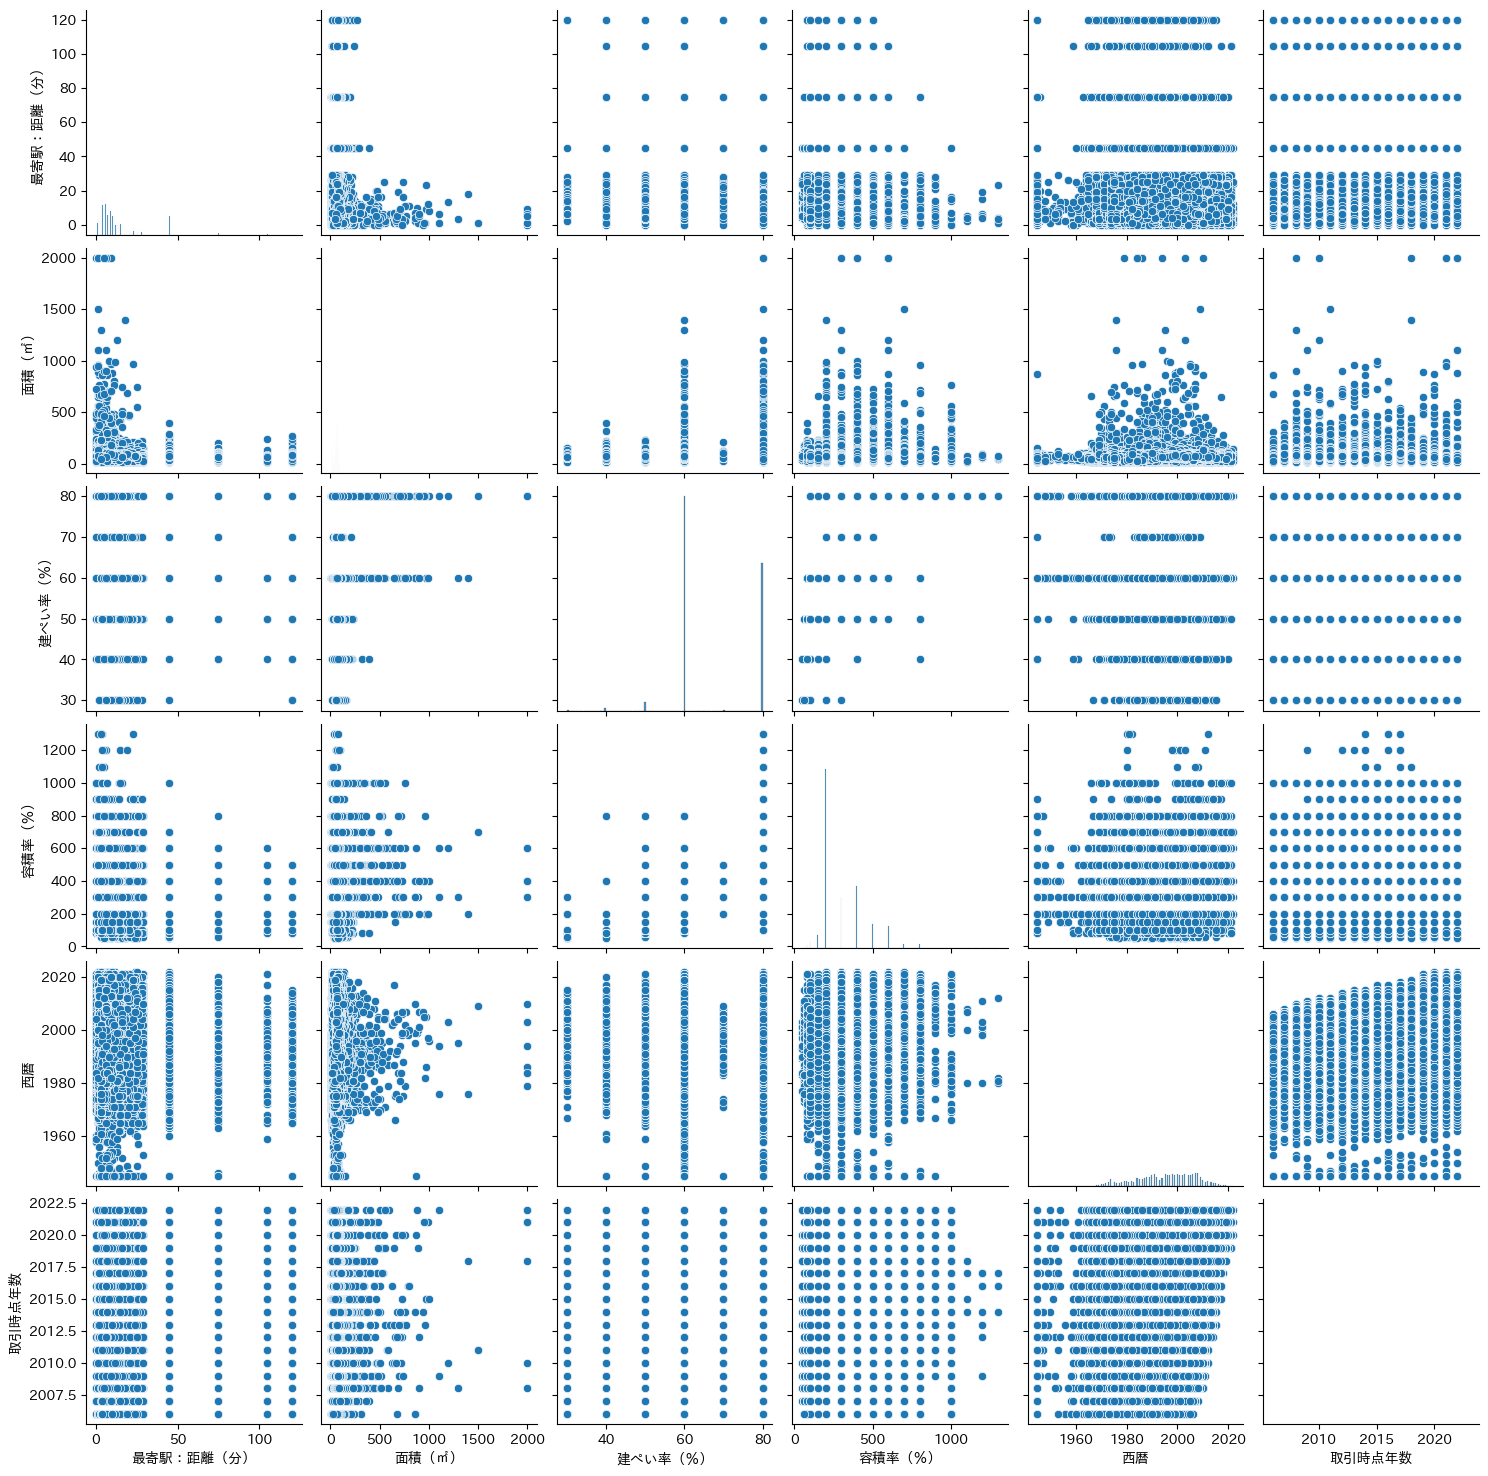

In [133]:
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
# sns.set(font='Hiragino Sans')zz
sns.pairplot(df_dummy[['最寄駅：距離（分）', '面積（㎡）', '建ぺい率（％）','容積率（％）','西暦','取引時点年数',]])

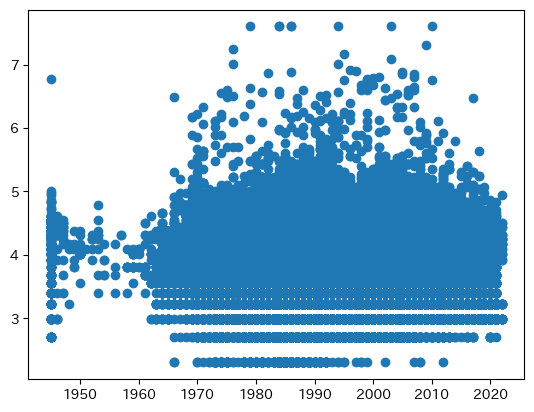

In [253]:
plt.scatter(x=(df_dummy['西暦']), y=np.log(df_dummy['面積（㎡）']))

In [144]:
df_dummy['最寄駅：距離（分）']

0          5
1         45
2         29
3         45
4         45
          ..
564688     5
564689     6
564690    16
564691    24
564692     3
Name: 最寄駅：距離（分）, Length: 564693, dtype: int32

In [153]:
np.log(df_dummy['最寄駅：距離（分）']).isnull().sum()

3379

(array([1.12000e+02, 3.93000e+02, 3.17000e+02, 9.78100e+03, 3.43020e+04,
        6.48490e+04, 1.03859e+05, 1.28846e+05, 1.43226e+05, 7.90080e+04]),
 array([-77. , -69.1, -61.2, -53.3, -45.4, -37.5, -29.6, -21.7, -13.8,
         -5.9,   2. ]),
 <BarContainer object of 10 artists>)

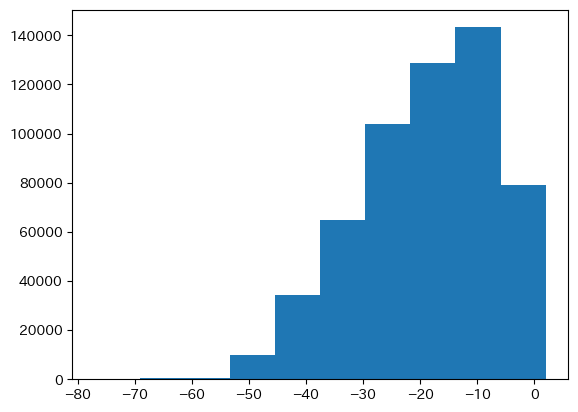

In [87]:
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.hist(df_dummy['西暦']-df_dummy['取引時点年数'])